In [1]:
import torch

# Use torchvision to get dataset and usefull image transformation
import torchvision
import torchvision.transforms as transforms

# now import pytorch optimization library and nn
#  nn is used as the basic building block for our Network graph

import torch.optim as optim
import torch.nn as nn

# using GPU 
print('Cuda GPU available: {}'.format(torch.cuda.is_available()))

Cuda GPU available: True


If Cuda available,set device cuda else cpu

In [2]:
if torch.cuda.is_available():
  device='cuda'
else:
  device='cpu'

device

'cuda'

In [3]:
# Normalize our value between -1 and 1

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, )) ])  #first 0.5 is mean and other one is std

## Fetch Our MNISt Dataset using  Torchvision

In [4]:
trainset = torchvision.datasets.MNIST('mnist', 
                                      train = True, 
                                      download = True,
                                      transform = transform)

# Load our Test Data and specify what transform to use when loading
testset = torchvision.datasets.MNIST('mnist', 
                                     train = False,
                                     download = True,
                                     transform = transform)

In [5]:
print(trainset.data.shape,testset.data.shape)
print()
print(trainset.data[0])

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0, 

## Plot this in OpenCV

In [6]:
def imgshow(title="", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

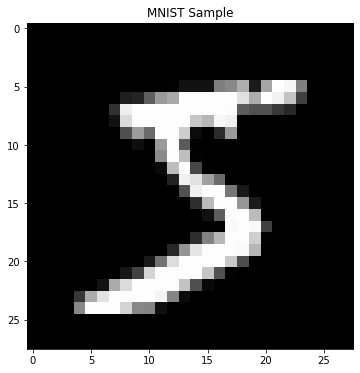

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = trainset.data[0].numpy()
imgshow("MNIST Sample", image)

## Show multiple examples

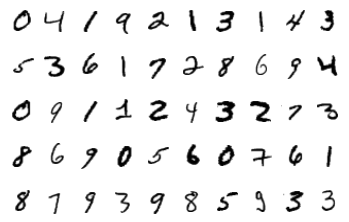

In [8]:
figure = plt.figure()
num_of_images = 50 

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index)
    plt.axis('off')
    plt.imshow(trainset.data[index], cmap='gray_r')

## Create Our DataLoader

In [9]:
# Prepare train and test loader
trainloader = torch.utils.data.DataLoader(trainset,
                                           batch_size = 128,
                                           shuffle = True,
                                           num_workers = 0)

testloader = torch.utils.data.DataLoader(testset,
                                          batch_size = 128,
                                          shuffle = False,
                                          num_workers = 0)

## Useing iter and next() for load batches

In [10]:
# We use the Python function iter to return an iterator for our train_loader object
dataiter = iter(trainloader)

# We use next to get the first batch of data from our iterator
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


## Image plotting using pytorch

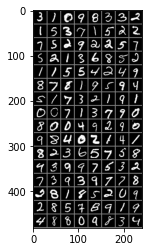

31098332153715227529225752136852115542498781959451732191007137908004929098402141823657584399753273939778281852092857891948809834


In [11]:
def imshow(img):
  img=img/2 +0.5
  # img+=0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print("".join('%1s' % labels[j].numpy() for j in range(128)))




## Build Model

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-29%20at%204.21.04%402x.png)

In [12]:
nn.Conv2d(in_channels=1,
          out_channels=32,
          kernel_size=3,
          stride=1,
          padding=1)



Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [13]:
import torch.nn as nn
import torch.nn.functional as f

# Generally imported into the namespace F by convention, this module contains all the functions in the torch.nn library (whereas other parts of
# the library contain classes). As well as a wide range of loss and activation functions, you’ll also find here some convenient functions for
# creating neural nets, such as pooling functions. (There are also functions for doing convolutions, linear layers, etc, but as we’ll see, these are 
# usually better handled using other parts of the library.) """                                                                                                                     

In [14]:

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    # This is our first cnn layer using 32 filters of 3x3 size, with stride of 1 and padding of 0
    self.conv1 = nn.Conv2d(1,32,3)

    # This is our first cnn layer using 32 filters of 3x3 size, with stride of 1 and padding of 0
    self.conv2 = nn.Conv2d(32,64,3)

    # Max pool layer is 2x2 kernel of stride 2
    self.pool=nn.MaxPool2d(2,2)
    # Fully connected layer is called Linear takes output of MaxPool
    self.fc1 = nn.Linear(64*12*12,128)
    # our second fully connected layer takes the input of first fully connected layer and gives output with 10 nodes (our class)
    self.fc2 = nn.Linear(128,10)


  # Forward Propagation sequence
  # we have to follow this sequence
  # conv1-Relu-conv2-Relu-MaxPool-Flatten-Fc1-Fc2
  def forward(self,x):

    x=f.relu(self.conv1(x))
    x=self.pool(f.relu(self.conv2(x)))
    # Flatten
    x=x.view(-1,64*12*12)
    x=f.relu(self.fc1(x))
    x=self.fc2(x)

    return x


net=Net()
net.to(device)



Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

## Define Loss Function and optimizer

In [15]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(),lr=0.001 , momentum=0.9)

## Training the Model

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/CleanShot%202020-11-29%20at%207.04.32%402x.png)

In [16]:
epochs=10

epoch_log= []
loss_log=[]
accuracy_log = []

for epoch in range(epochs):
  print(f'Starting Epoch: {epoch+1} >>>')

  running_loss=0

  # now iterate through trainloader iterator
  for i,data in enumerate(trainloader,0):

    inputs,labels=data

    # move data to GPU
    inputs=inputs.to(device)
    labels=labels.to(device)

    # clear gradient brfore start training to zero
    optimizer.zero_grad()

    # forward propagation
    outputs = net(inputs)
    loss=criterion(outputs,labels)

    loss.backward()
    # update the gradient/weight
    optimizer.step()

    running_loss+=loss.item()

    if i%50 == 49:
      correct=0
      total =0

      # don't apply gradient for validation
      with torch.no_grad():
        for data in testloader:
          images,labels=data

          # move data to GPU
          images=images.to(device)
          labels=labels.to(device)

          # forward propagation for validation data
          outputs=net(images)

          # get the prediction from the maximum value of predicted output
          # set dim to 1 , it means 1 dimension will be reduce

          _,predicted=torch.max(outputs.data,dim=1)
          total+=labels.size(0)

          correct+=(predicted == labels).sum().item()
        
        accuracy = 100*correct / total

        epoch_num = epoch+1
        actual_loss=running_loss/50
        print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
        running_loss = 0.0

  epoch_log.append(epoch_num)
  loss_log.append(actual_loss)
  accuracy_log.append(accuracy)

print('Finished Training')





Starting Epoch: 1 >>>
Epoch: 1, Mini-Batches Completed: 50, Loss: 2.258, Test Accuracy = 46.790%
Epoch: 1, Mini-Batches Completed: 100, Loss: 2.068, Test Accuracy = 75.570%
Epoch: 1, Mini-Batches Completed: 150, Loss: 1.525, Test Accuracy = 79.840%
Epoch: 1, Mini-Batches Completed: 200, Loss: 0.833, Test Accuracy = 84.630%
Epoch: 1, Mini-Batches Completed: 250, Loss: 0.540, Test Accuracy = 87.660%
Epoch: 1, Mini-Batches Completed: 300, Loss: 0.449, Test Accuracy = 88.190%
Epoch: 1, Mini-Batches Completed: 350, Loss: 0.407, Test Accuracy = 89.540%
Epoch: 1, Mini-Batches Completed: 400, Loss: 0.356, Test Accuracy = 90.250%
Epoch: 1, Mini-Batches Completed: 450, Loss: 0.358, Test Accuracy = 90.030%
Starting Epoch: 2 >>>
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.330, Test Accuracy = 91.470%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.323, Test Accuracy = 91.780%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.306, Test Accuracy = 92.010%
Epoch: 2, Mini-Batches Completed: 200, Loss: 0

## Save Model

In [17]:
PATH = './mnist_cnn_net.pth'
torch.save(net.state_dict(),PATH)



## Check the test data

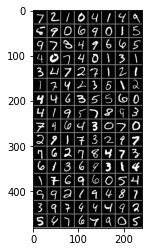

GroundTruth:  72104149590690159734966540740131347271211742351244635560419578937464307029173297762784736136931417696054992194873974449254767905


In [18]:
dataiter = iter(testloader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ',''.join('%1s' %labels[j].numpy() for j in range(128)))

## Visualize and Predict

### Load the Model

In [19]:
net = Net()
net.to(device)

net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

### Getting Predictions

In [20]:
test_iter = iter(testloader)
images,labels = test_iter.next()

images=images.to(device)
labels=labels.to(device)

outputs = net(images)

# imshow(torchvision.utils.make_grid(images))
_,predicted=torch.max(outputs.data,dim=1)
print('Predicted: ',''.join('%1s' %labels[j].cpu().numpy() for j in range(128)))



Predicted:  72104149590690159734966540740131347271211742351244635560419578937464307029173297762784736136931417696054992194873974449254767905


### Displaying Accuracy

In [21]:
correct = 0
total =0

with torch.no_grad():
  for data in testloader:
    images,labels = data

    images=images.to(device)
    labels=labels.to(device)
    outputs = net(images)

    _,predicted = torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()



accuracy= 100*correct/total

print(f'Accuracy of the network on the 10,000 test images : {accuracy:.3}%')


Accuracy of the network on the 10,000 test images : 98.2%


### Ploting training logs

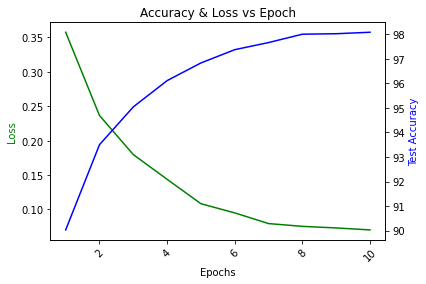

In [22]:
# To create a plot with secondary y-axis we need to create a subplot
fig, ax1 = plt.subplots()

# Set title and x-axis label rotation
plt.title("Accuracy & Loss vs Epoch")
plt.xticks(rotation=45)

# We use twinx to create a plot a secondary y axis
ax2 = ax1.twinx()

# Create plot for loss_log and accuracy_log
ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

# Set labels
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()

## Observations

In [23]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# We don't need gradients for validation, so wrap in 
# no_grad to save memory
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)

        # Get our outputs
        outputs = net(images)

        # use torch.max() to get the predicted class for the first dim of our batch
        # note this is just the first 16 data points/images of our batch of 128 images 
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        
        for i in range(15):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    class_accuracy = 100 * class_correct[i] / class_total[i]
    print(f'Accuracy of {i} : {class_accuracy:.3f}%')

Accuracy of 0 : 100.000%
Accuracy of 1 : 97.744%
Accuracy of 2 : 97.656%
Accuracy of 3 : 98.333%
Accuracy of 4 : 95.276%
Accuracy of 5 : 99.074%
Accuracy of 6 : 97.222%
Accuracy of 7 : 99.187%
Accuracy of 8 : 99.000%
Accuracy of 9 : 96.748%


In [24]:
c

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True], device='cuda:0')

Actual Label: 2, Predicted Label: 4


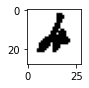

Actual Label: 0, Predicted Label: 6


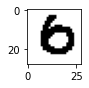

Actual Label: 7, Predicted Label: 9


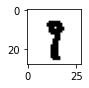

Actual Label: 7, Predicted Label: 2


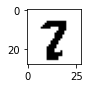

Actual Label: 3, Predicted Label: 5


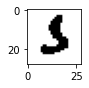

Actual Label: 0, Predicted Label: 6


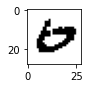

Actual Label: 5, Predicted Label: 3


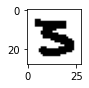

Actual Label: 2, Predicted Label: 8


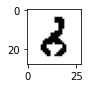

Actual Label: 2, Predicted Label: 8


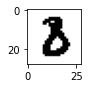

Actual Label: 8, Predicted Label: 1


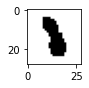

Actual Label: 1, Predicted Label: 2


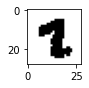

Actual Label: 3, Predicted Label: 7


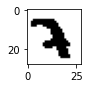

Actual Label: 6, Predicted Label: 0


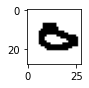

Actual Label: 8, Predicted Label: 5


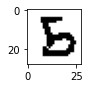

Actual Label: 9, Predicted Label: 4


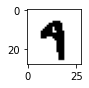

Actual Label: 8, Predicted Label: 9


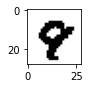

Actual Label: 9, Predicted Label: 4


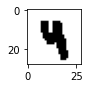

Actual Label: 7, Predicted Label: 9


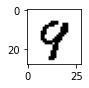

Actual Label: 9, Predicted Label: 8


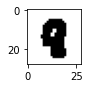

Actual Label: 2, Predicted Label: 1


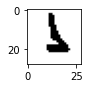

Actual Label: 0, Predicted Label: 6


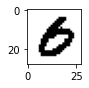

Actual Label: 5, Predicted Label: 6


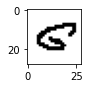

Actual Label: 2, Predicted Label: 7


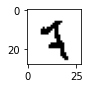

Actual Label: 8, Predicted Label: 6


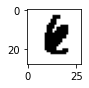

Actual Label: 1, Predicted Label: 6


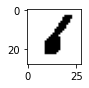

Actual Label: 8, Predicted Label: 6


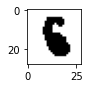

Actual Label: 2, Predicted Label: 7


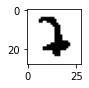

Actual Label: 4, Predicted Label: 9


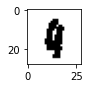

Actual Label: 9, Predicted Label: 4


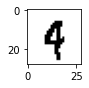

Actual Label: 0, Predicted Label: 9


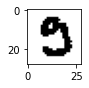

Actual Label: 7, Predicted Label: 5


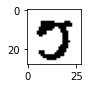

Actual Label: 3, Predicted Label: 8


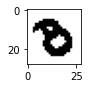

Actual Label: 2, Predicted Label: 7


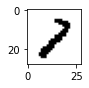

Actual Label: 3, Predicted Label: 5


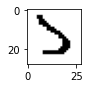

Actual Label: 1, Predicted Label: 7


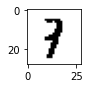

Actual Label: 9, Predicted Label: 7


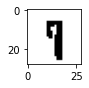

Actual Label: 6, Predicted Label: 1


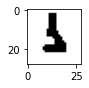

Actual Label: 7, Predicted Label: 8


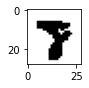

Actual Label: 2, Predicted Label: 4


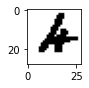

Actual Label: 6, Predicted Label: 0


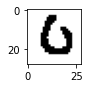

Actual Label: 7, Predicted Label: 4


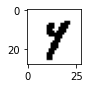

Actual Label: 0, Predicted Label: 2


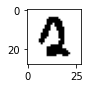

Actual Label: 7, Predicted Label: 3


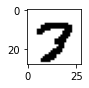

Actual Label: 3, Predicted Label: 9


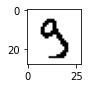

Actual Label: 0, Predicted Label: 8


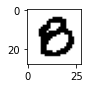

Actual Label: 2, Predicted Label: 7


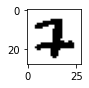

Actual Label: 7, Predicted Label: 2


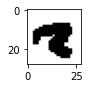

Actual Label: 2, Predicted Label: 6


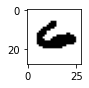

Actual Label: 3, Predicted Label: 8


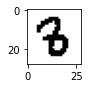

Actual Label: 4, Predicted Label: 9


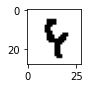

Actual Label: 2, Predicted Label: 7


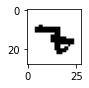

Actual Label: 2, Predicted Label: 7


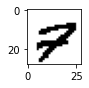

Actual Label: 2, Predicted Label: 7


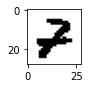

Actual Label: 7, Predicted Label: 1


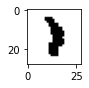

Actual Label: 3, Predicted Label: 5


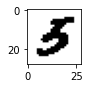

Actual Label: 8, Predicted Label: 4


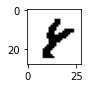

Actual Label: 9, Predicted Label: 4


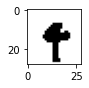

Actual Label: 0, Predicted Label: 2


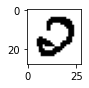

Actual Label: 0, Predicted Label: 6


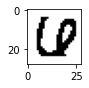

Actual Label: 2, Predicted Label: 9


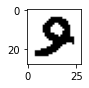

Actual Label: 9, Predicted Label: 4


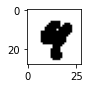

Actual Label: 1, Predicted Label: 6


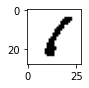

Actual Label: 2, Predicted Label: 1


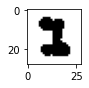

Actual Label: 1, Predicted Label: 9


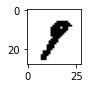

Actual Label: 6, Predicted Label: 1


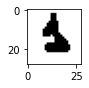

Actual Label: 0, Predicted Label: 8


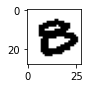

Actual Label: 0, Predicted Label: 9


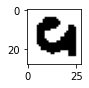

Actual Label: 3, Predicted Label: 5


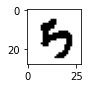

Actual Label: 1, Predicted Label: 9


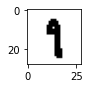

Actual Label: 1, Predicted Label: 9


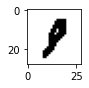

Actual Label: 8, Predicted Label: 6


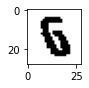

Actual Label: 0, Predicted Label: 2


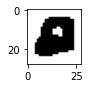

Actual Label: 4, Predicted Label: 2


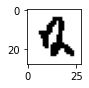

Actual Label: 9, Predicted Label: 4


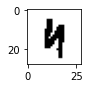

Actual Label: 8, Predicted Label: 7


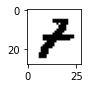

Actual Label: 1, Predicted Label: 6


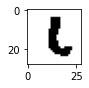

Actual Label: 4, Predicted Label: 9


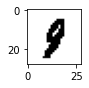

Actual Label: 9, Predicted Label: 4


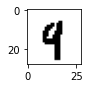

Actual Label: 0, Predicted Label: 8


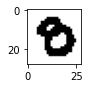

Actual Label: 2, Predicted Label: 3


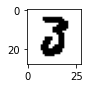

Actual Label: 2, Predicted Label: 3


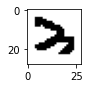

Actual Label: 5, Predicted Label: 9


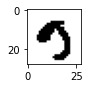

Actual Label: 5, Predicted Label: 3


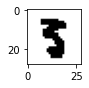

Actual Label: 7, Predicted Label: 9


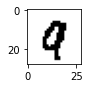

Actual Label: 8, Predicted Label: 6


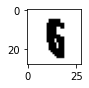

Actual Label: 7, Predicted Label: 9


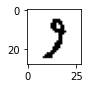

Actual Label: 2, Predicted Label: 1


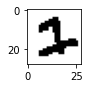

Actual Label: 3, Predicted Label: 8


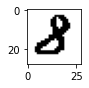

Actual Label: 0, Predicted Label: 6


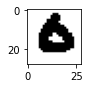

Actual Label: 1, Predicted Label: 9


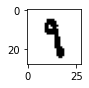

Actual Label: 4, Predicted Label: 6


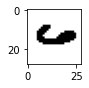

Actual Label: 5, Predicted Label: 6


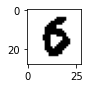

Actual Label: 0, Predicted Label: 5


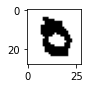

Actual Label: 5, Predicted Label: 8


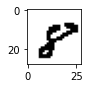

Actual Label: 3, Predicted Label: 9


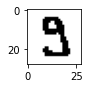

Actual Label: 9, Predicted Label: 4


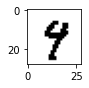

Actual Label: 9, Predicted Label: 4


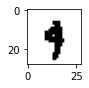

Actual Label: 2, Predicted Label: 7


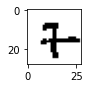

Actual Label: 2, Predicted Label: 7


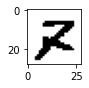

Actual Label: 2, Predicted Label: 4


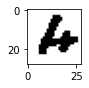

Actual Label: 8, Predicted Label: 7


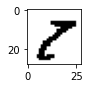

Actual Label: 3, Predicted Label: 2


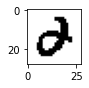

Actual Label: 5, Predicted Label: 6


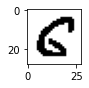

Actual Label: 2, Predicted Label: 1


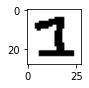

Actual Label: 2, Predicted Label: 4


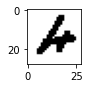

Actual Label: 5, Predicted Label: 6


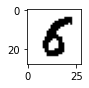

Actual Label: 2, Predicted Label: 0


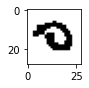

Actual Label: 0, Predicted Label: 8


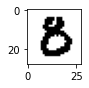

Actual Label: 3, Predicted Label: 9


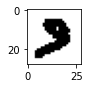

Actual Label: 0, Predicted Label: 9


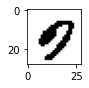

Actual Label: 7, Predicted Label: 2


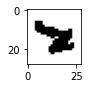

Actual Label: 7, Predicted Label: 9


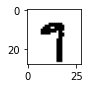

Actual Label: 3, Predicted Label: 7


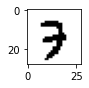

Actual Label: 1, Predicted Label: 2


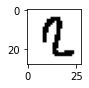

Actual Label: 7, Predicted Label: 4


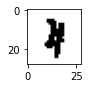

Actual Label: 8, Predicted Label: 2


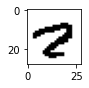

Actual Label: 4, Predicted Label: 9


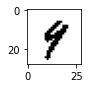

Actual Label: 7, Predicted Label: 8


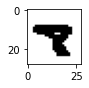

Actual Label: 5, Predicted Label: 6


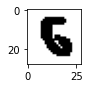

Actual Label: 2, Predicted Label: 4


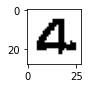

Actual Label: 4, Predicted Label: 2


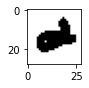

Actual Label: 9, Predicted Label: 8


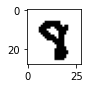

Actual Label: 2, Predicted Label: 7


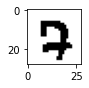

Actual Label: 5, Predicted Label: 3


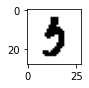

Actual Label: 8, Predicted Label: 9


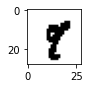

Actual Label: 0, Predicted Label: 8


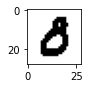

Actual Label: 5, Predicted Label: 3


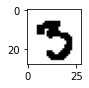

Actual Label: 0, Predicted Label: 6


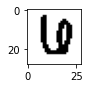

Actual Label: 4, Predicted Label: 9


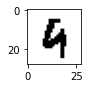

Actual Label: 4, Predicted Label: 8


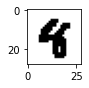

Actual Label: 3, Predicted Label: 7


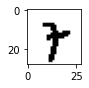

Actual Label: 5, Predicted Label: 3


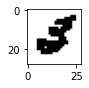

Actual Label: 9, Predicted Label: 4


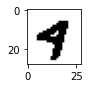

Actual Label: 8, Predicted Label: 2


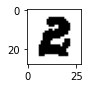

Actual Label: 5, Predicted Label: 1


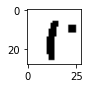

Actual Label: 7, Predicted Label: 3


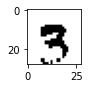

Actual Label: 7, Predicted Label: 4


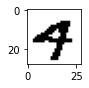

Actual Label: 0, Predicted Label: 7


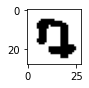

Actual Label: 0, Predicted Label: 4


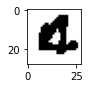

Actual Label: 8, Predicted Label: 3


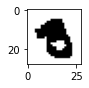

Actual Label: 8, Predicted Label: 3


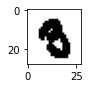

Actual Label: 5, Predicted Label: 9


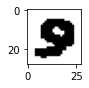

Actual Label: 3, Predicted Label: 9


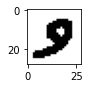

Actual Label: 5, Predicted Label: 9


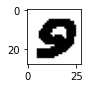

Actual Label: 0, Predicted Label: 9


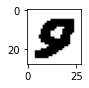

Actual Label: 0, Predicted Label: 9


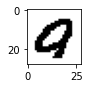

Actual Label: 2, Predicted Label: 3


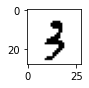

Actual Label: 7, Predicted Label: 9


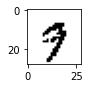

Actual Label: 1, Predicted Label: 7


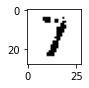

Actual Label: 7, Predicted Label: 0


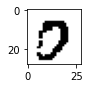

Actual Label: 8, Predicted Label: 0


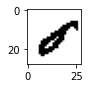

Actual Label: 4, Predicted Label: 6


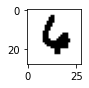

Actual Label: 9, Predicted Label: 8


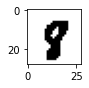

Actual Label: 8, Predicted Label: 4


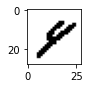

Actual Label: 8, Predicted Label: 5


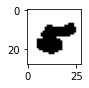

Actual Label: 4, Predicted Label: 2


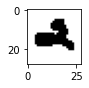

Actual Label: 1, Predicted Label: 2


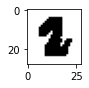

Actual Label: 1, Predicted Label: 2


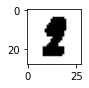

Actual Label: 5, Predicted Label: 8


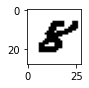

Actual Label: 9, Predicted Label: 3


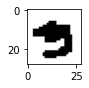

Actual Label: 4, Predicted Label: 6


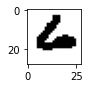

Actual Label: 6, Predicted Label: 8


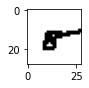

Actual Label: 2, Predicted Label: 7


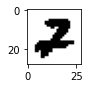

Actual Label: 2, Predicted Label: 7


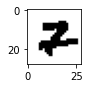

Actual Label: 2, Predicted Label: 7


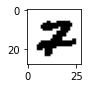

Actual Label: 2, Predicted Label: 7


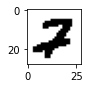

Actual Label: 8, Predicted Label: 9


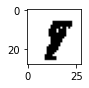

Actual Label: 8, Predicted Label: 0


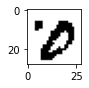

Actual Label: 7, Predicted Label: 9


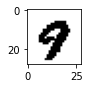

Actual Label: 7, Predicted Label: 9


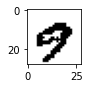

Actual Label: 7, Predicted Label: 2


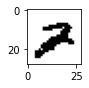

Actual Label: 3, Predicted Label: 6


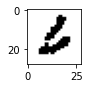

Actual Label: 7, Predicted Label: 9


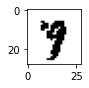

Actual Label: 5, Predicted Label: 6


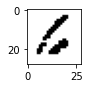

Actual Label: 6, Predicted Label: 5


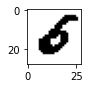

Actual Label: 0, Predicted Label: 5


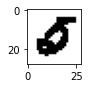

Actual Label: 7, Predicted Label: 2


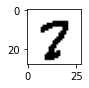

Actual Label: 5, Predicted Label: 9


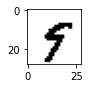

Actual Label: 6, Predicted Label: 5


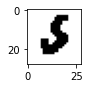

In [25]:
net.eval()

# We don't need gradients for validation, so wrap in 
# no_grad to save memory
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)

        # Get our outputs
        outputs = net(images)

        # use torch.argmax() to get the predictions, argmax is used for long_tensors
        predictions = torch.argmax(outputs, dim=1)

        # For test data in each batch we identify when predictions did not match the label
        # then we print out the actual ground truth 
        for i in range(data[0].shape[0]):
            pred = predictions[i].item()
            label = labels[i]
            if(label != pred):
                print(f'Actual Label: {pred}, Predicted Label: {label}')       
                img = np.reshape(images[i].cpu().numpy(),[28,28])
                imgshow("", np.uint8(img), size = 1)